# Project 3: Bank Customer Churn Prediction using Classification Modelling

### <i> Data: Bank Customer Churn <i>

<b> Description </b>: The objective of this project is to showcase the skills related to data preprocessing, data analysis, visualisation, and classifiction model building and evaluation. The <a href=https://www.kaggle.com/datasets/muratcakmak/churn-modelling-bank-customer>dataset</a> was taken from Kaggle (author: MURAT ÇAKMAK); it contains open-source (or mock) bank customers data that can help predict the customers churn.

In the first section of this project, I perform data preprocessing which inludes data inspection and cleaning, exploratory data analysis, visualisation as well as feature engineering in order to prepare the data for model building.<br>In the second section, I train and test seven different classification models, and finally create an ensemble model that incorporates three best performing models and predicts whether a customer is likely to leave the bank.

# 1. Data Preprocessing

## 1.1. Data Inspection and Cleaning

In [396]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [397]:
# Load the file
df = pd.read_csv('customer_churn.csv')

In [398]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [399]:
df.shape

(10000, 14)

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [401]:
# Categorical variables

print("Number of categorical variables: ", df.select_dtypes('object').shape[1])
df.select_dtypes('object').head()

Number of categorical variables:  3


,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [402]:
# Numerical variables

print("Number of numerical variables: ", df.select_dtypes(exclude='object').shape[1])
df.select_dtypes(exclude='object').head()

Number of numerical variables:  11


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [403]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

#### Remove unnecessaty columns

In [404]:
churn = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

#### Label encode 'Gender' column

In [405]:
# Label encoding will replace Female and Male with 0 and 1, respecfully

from sklearn.preprocessing import LabelEncoder

churn["Gender"]=LabelEncoder().fit_transform(churn["Gender"])

#### Save the cleaned data

In [449]:
churn.to_csv("churn_cleaned.csv", index=False)

## 1.2. Data Analysis and Visualization 

### 1.2.1. Examine numerical variables

In [406]:
churn.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Correlation between numerical variables

<Axes: >

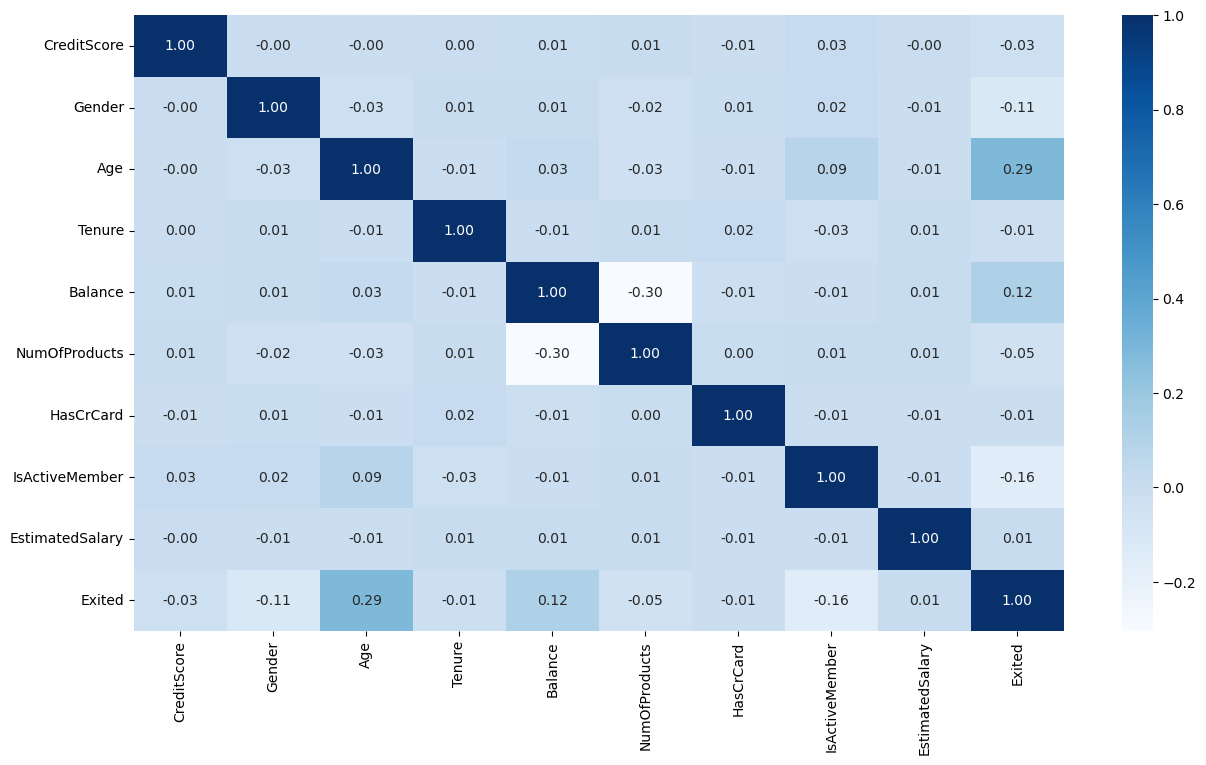

In [407]:
correlation = churn.corr()

plt.figure(figsize=(15,8))
sns.heatmap(correlation, fmt='.2f', annot=True, cmap='Blues')

The correltion map shows that there are several variables that considerably impact our target variable, 'exited':
- 'Age': positive correlaion (0.29)
- 'Balance': positive correlation (0.12)
- 'Gender': negative correlation (-0.11)
- 'IsActiveMember': negative correlation (-0.16)

There is also significant correlation between the following variables:
- 'Balance' and 'NumOfProducts' (-0.3)
- 'Age' and 'IsActiveMember' (0.09)

#### Variable insights

In [408]:
# Number of active members

print("The number of active users in this bank:" 
      , churn['IsActiveMember'].value_counts()[1], "out of", len(churn['IsActiveMember']))

The number of active users in this bank: 5151 out of 10000


In [409]:
# Exited ratio

print(((churn['Exited'].value_counts()[1]/churn['Exited'].value_counts()[0])*100).round(2), "% of customers have exited")

25.58 % of customers have exited


In [410]:
# Number of credit card owners

print("The number of customers who own credit cards:" 
      , churn['HasCrCard'].value_counts()[1], "out of", len(churn['HasCrCard']))

The number of customers who own credit cards: 7055 out of 10000


In [411]:
# Number of Female vs Male customers

print("Female:", churn['Gender'].value_counts()[0])
print("Male:", churn['Gender'].value_counts()[1])

Female: 4543
Male: 5457


In [412]:
# Number of products per customer count

churn['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [413]:
# Non-numerial variable, 'Geograpy'

churn['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

### 1.2.1. Examine non-numerical variable

After data cleaning and label encoding, we have one non-numerical variable: Geography.

In [414]:
churn['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

#### ANOVA f-test and Post-hoc

In order to understand howw significant the impact of the non-numerical variable 'Geography' on the target variable, 'Exited', I will perform analysis of variance, or ANOVA f-test. Considering significance level to be 0.05, the hypothesis are the following:

H0: µ1= µ2=...= µk

H1: there is at least one population mean that differs from the rest.

If p-value is less than 0.05, the null hypothesis is rejected.

- <i><b> Exited customers and Geography </i>

Since the neighbourhood groups don't have the same size of data, first, I create random samples of the size of 2000 for each group, and then perform the ANOVA f-test.

In [415]:
from scipy.stats import f_oneway

data_france = churn[churn['Geography']=='France'][['Geography','Exited']]
data_germany = churn[churn['Geography']=='Germany'][['Geography','Exited']]
data_spain = churn[churn['Geography']=='Spain'][['Geography','Exited']]

s1 = data_france.sample(n=2000).Exited.to_list()
s2 = data_germany.sample(n=2000).Exited.to_list()
s3 = data_spain.sample(n=2000).Exited.to_list()

f_value, p_value = f_oneway(s1, s2)

# print the results
print("F-value: ", f_value)
print("p-value: ", p_value)

F-value:  156.69400056607836
p-value:  2.7176751545206323e-35


The p_value is way smaller than 0.05, which means that we cannot accept H<sub>0</sub>, and that the categorical variable, Geography, has significant influence on the target variable, 'Exited'.

The next step is to perform <b>post-hoc</b> in order to further investigate pairwise differences among groups and avoid making false conclusions about differences among groups. The post-hoc is done using T-test.

In [416]:
from scipy.stats import ttest_ind

groups = ['France', 'Germany', 'Spain']
samples = [s1, s2, s3]

for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        t_value, p_value = ttest_ind(samples[i], samples[j])
        print(f"T-test between {groups[i]} and {groups[j]}:")
        print(f"t-value: {t_value}, p-value: {p_value}")

T-test between France and Germany:
t-value: -12.517747423801067, p-value: 2.71767515452437e-35
T-test between France and Spain:
t-value: -0.5167842698811849, p-value: 0.605335346812525
T-test between Germany and Spain:
t-value: 11.995988443185857, p-value: 1.344385501091388e-32


We can see that two pairs (France/Germany and Germany/Spain) are significantly different from each other, however, the pair France/Spain appears to have no significant difference between the means of the groups.

### 1.2.3 Visualization

- <b><i>Gender proportion<i></b>

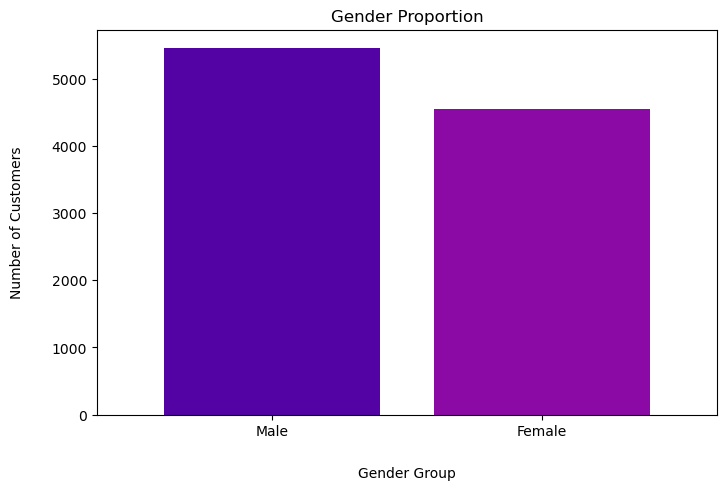

In [417]:
colors = sns.color_palette("plasma")

gender = churn["Gender"].value_counts()
churn["Gender"].value_counts().plot.bar(color=colors, width=0.8, figsize=(8, 5))

plt.xlabel('Gender Group', labelpad=20)
plt.ylabel('Number of Customers', labelpad=20)
plt.title('Gender Proportion')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)

plt.show()

- <b><i>Geography proportion<i></b>

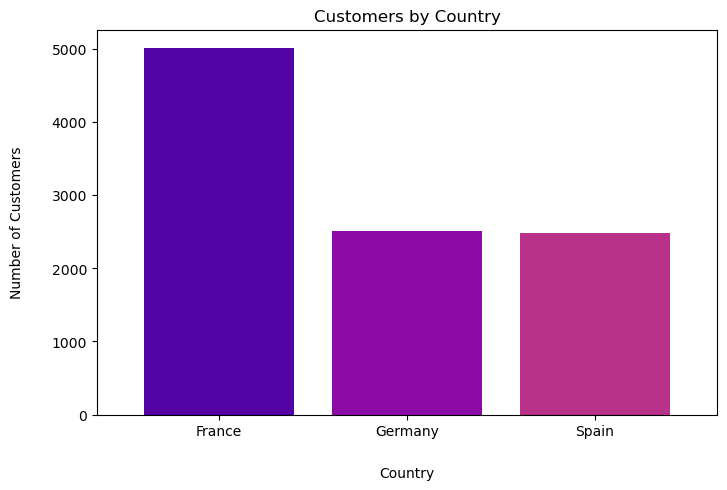

In [418]:
geography = churn["Geography"].value_counts()
geography.plot.bar(color=colors, width=0.8, figsize=(8, 5))

plt.xlabel('Country', labelpad=20)
plt.ylabel('Number of Customers', labelpad=20)
plt.title('Customers by Country')
plt.xticks(rotation=0)

plt.show()

- <b><i>Age distribution<i></b>

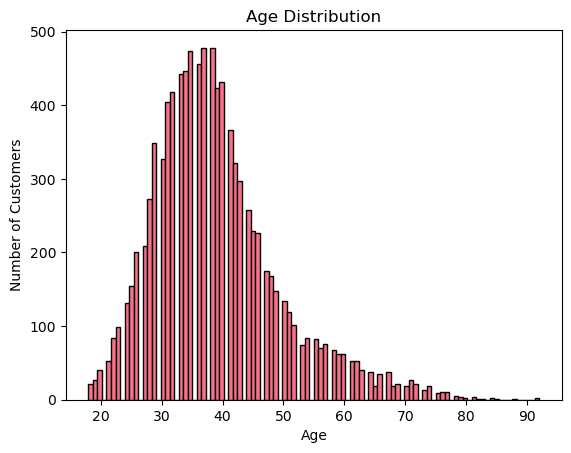

In [419]:
sns.set_palette("husl")
plt.hist(churn['Age'], bins=100, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age Distribution')

plt.show()

- <b><i>Exited proportion<i></b>

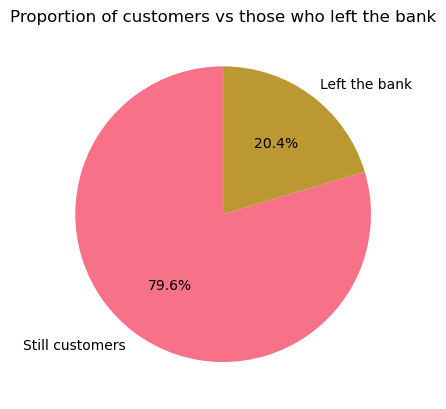

In [420]:
exited = churn['Exited'].value_counts()
plt.pie(exited, labels=['Still customers', 'Left the bank'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of customers vs those who left the bank')

plt.show()

- <b><i>Estimated salary distribution<i></b>

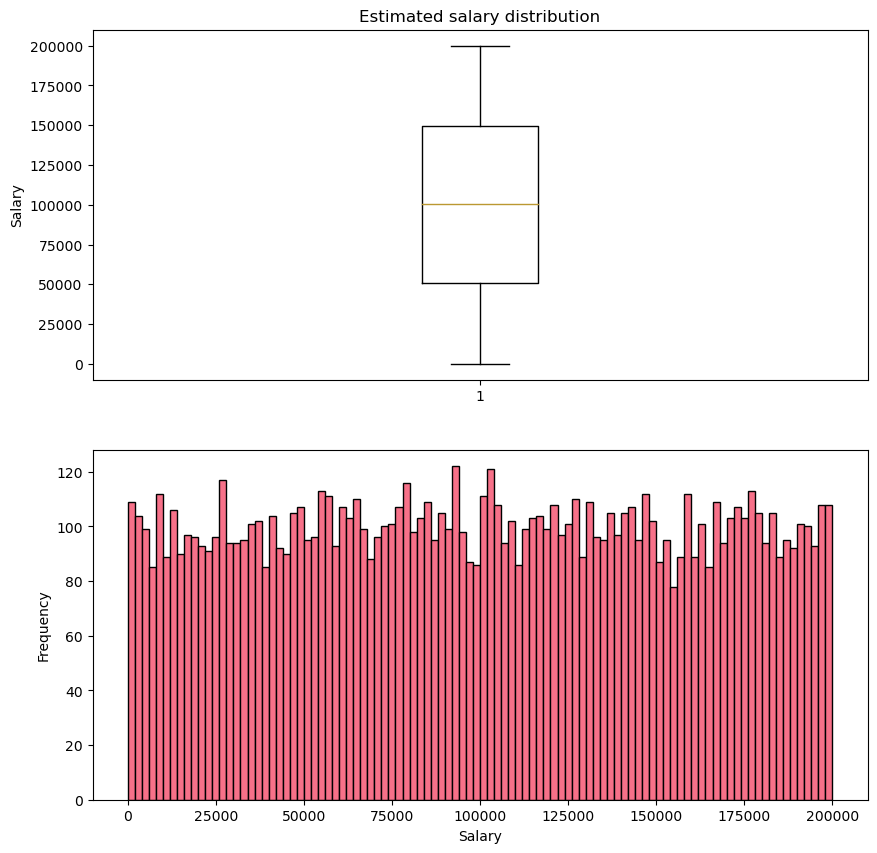

In [421]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.boxplot(churn['EstimatedSalary'])
ax1.set_ylabel('Salary')
ax1.set_title('Estimated salary distribution')

ax2.hist(churn['EstimatedSalary'], bins=100, edgecolor='black')
ax2.set_xlabel('Salary')
ax2.set_ylabel('Frequency')

plt.show()

- <b><i>Balance distribution<i></b>

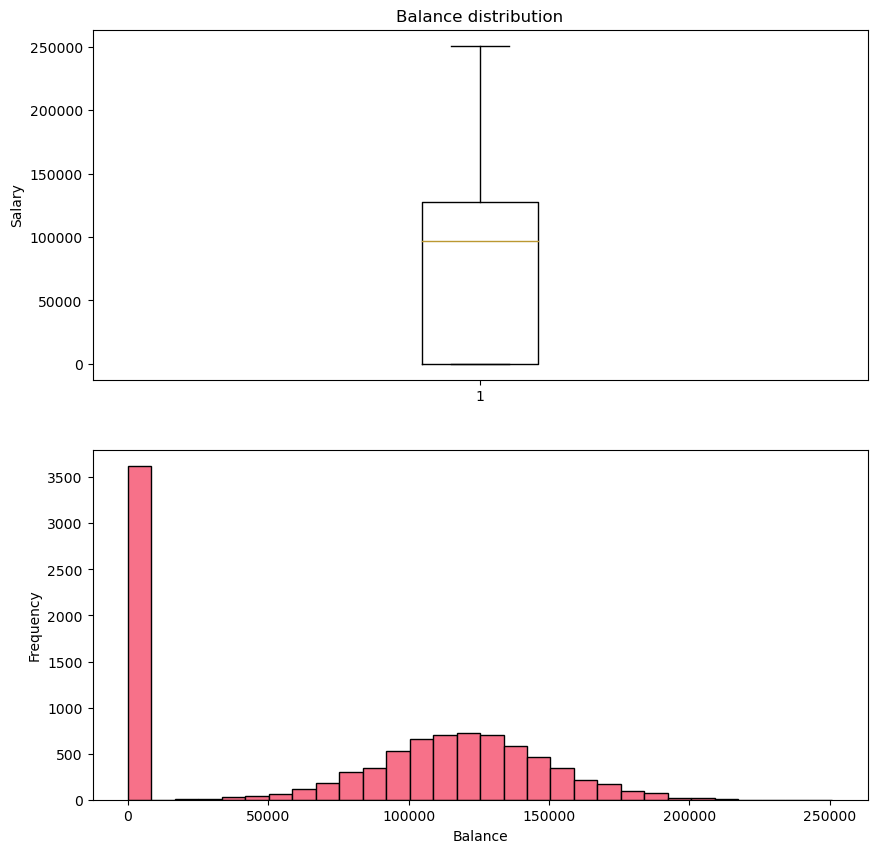

In [422]:
sns.set_palette("husl")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.boxplot(churn['Balance'])
ax1.set_ylabel('Salary')
ax1.set_title('Balance distribution')

ax2.hist(churn['Balance'], bins=30, edgecolor='black')
ax2.set_xlabel('Balance')
ax2.set_ylabel('Frequency')

plt.show()

- <b><i>Proportion of exited customers among active members<i></b>

Text(0, 0.5, 'Number of Customers')

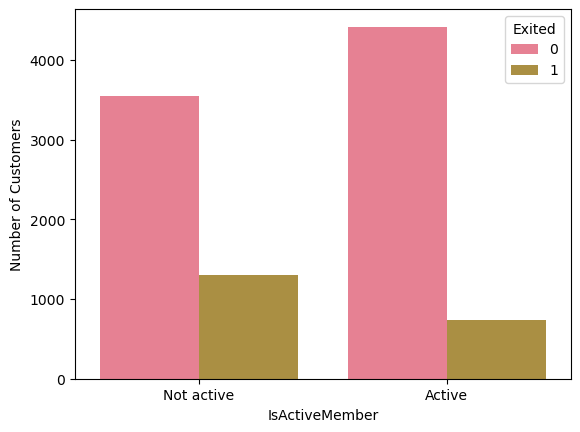

In [423]:
sns.set_palette("husl")
ax = sns.countplot(x='IsActiveMember', hue='Exited', data=churn)
ax.set_xticklabels(['Not active', 'Active'])
ax.set_ylabel("Number of Customers")

- <b><i>Number of products per customer<i></b>

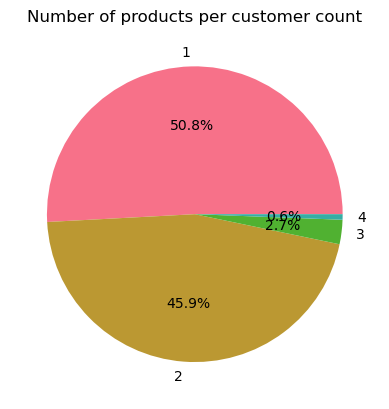

In [424]:
exited = churn['NumOfProducts'].value_counts()
plt.pie(exited, labels=['1', '2', '3', '4'], autopct='%1.1f%%', startangle=0)
plt.title('Number of products per customer count')

plt.show()

- <b><i>Credit card owners and credit scores<i></b>

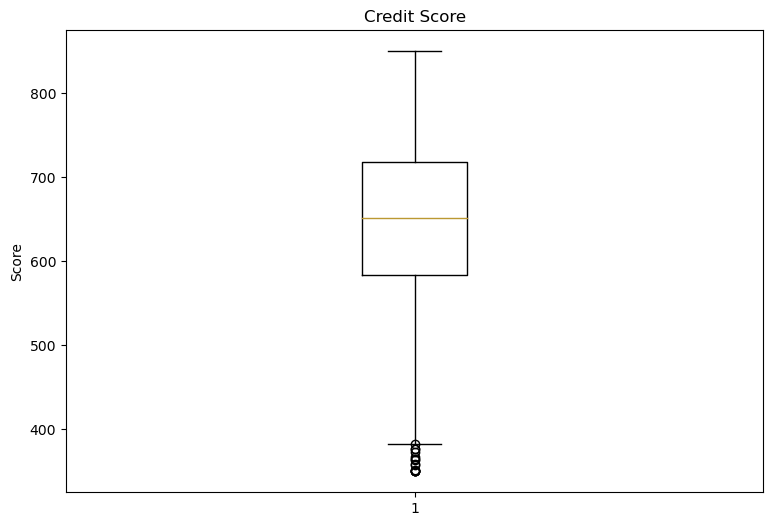

In [425]:
sns.set_palette("husl")
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

ax.boxplot(churn['CreditScore'])
ax.set_ylabel('Score')
ax.set_title('Credit Score')

plt.show()

- <b><i>Tenure<i></b>

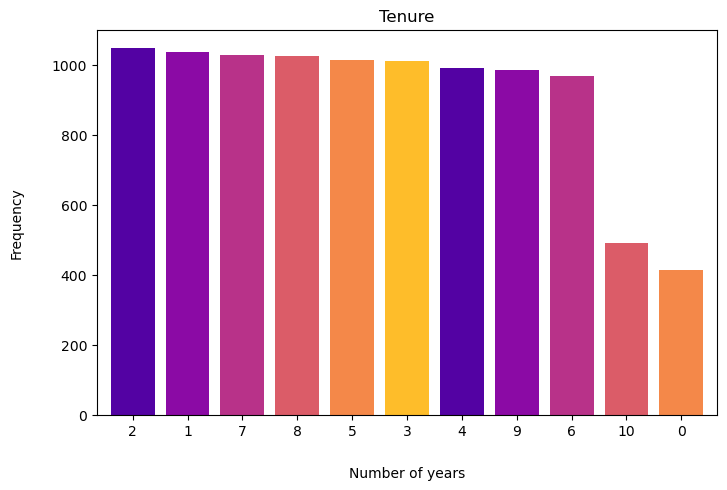

In [426]:
sns.set_palette("husl")

churn["Tenure"].value_counts().plot.bar(color=colors, width=0.8, figsize=(8, 5))

plt.xlabel('Number of years', labelpad=20)
plt.ylabel('Frequency', labelpad=20)
plt.title('Tenure')
plt.xticks(rotation=0)

plt.show()

## 1.3. Feature Engineering

In [447]:
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


### 1.3.1. Remove unnecessary columns 

In [428]:
churn_feat = churn.drop(['CreditScore', 'HasCrCard', 'EstimatedSalary', 'Tenure'], axis=1)
churn_feat.head()

,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,France,0,42,0.00,1,1,1
1,Spain,0,41,83807.86,1,1,0
2,France,0,42,159660.80,3,0,1
3,France,0,39,0.00,2,0,0
4,Spain,0,43,125510.82,1,1,0


Note: The columns are removed on the basis of previosuly conducted correlation analysis and analysis of variance.

### 1.3.2. Feature scaling

In [429]:
from sklearn.preprocessing import StandardScaler
import copy

scaler = StandardScaler().fit(churn_feat[['Balance', 'Age']])
churn_feat_scaled = copy.deepcopy(churn_feat)
churn_feat_scaled[['Balance', 'Age']] = scaler.transform(churn_feat_scaled[['Balance', 'Age']])

churn_feat_scaled.head()

,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,France,0,0.293517,-1.225848,1,1,1
1,Spain,0,0.198164,0.117350,1,1,0
2,France,0,0.293517,1.333053,3,0,1
3,France,0,0.007457,-1.225848,2,0,0
4,Spain,0,0.388871,0.785728,1,1,0


### 1.3.3. One-hot encoding

In [430]:
churn_model = pd.concat([churn_feat_scaled.drop(['Geography'], axis=1),
                            pd.get_dummies(churn_feat_scaled[['Geography']])], axis=1)

churn_model.head()

,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0,0.293517,-1.225848,1,1,1,1,0,0
1,0,0.198164,0.117350,1,1,0,0,0,1
2,0,0.293517,1.333053,3,0,1,1,0,0
3,0,0.007457,-1.225848,2,0,0,1,0,0
4,0,0.388871,0.785728,1,1,0,0,0,1


# 2. Model Building

In [431]:
# Import libraries for model building and evaluating
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

## 2.1. Addressing Imbalance

In [432]:
# Define the independent variables and dependent variable
X = churn_model.drop(['Exited'], axis=1)
Y = churn_model['Exited']

In [433]:
Y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

We can see that our target variable is highly imbalanced, which can cause the resulting model to be biased towards the majority class and perform poorly on the minority class. In order to balance it, I'm going to use <b>SMOTE</b> (Synthetic Minority Over-sampling Technique), which is an oversampling technique used to increase the number of samples in the minority class by generating synthetic samples of the class.

In [434]:
X_data, Y_data = SMOTE().fit_resample(X,Y)

Y_data.value_counts()
Y_data.shape

(15926,)

## 2.2. Splitting the Data

In [435]:
# Get training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=7, stratify=Y_data)

print(X.shape, X_train.shape, X_test.shape)

(10000, 8) (12740, 8) (3186, 8)


## 2.3. Model Training and Evaluation

In this section, I train three different classfication models and evaluate them in order to later build an ensemble classifier. The models include: 

The metrics I chose for model evaluation are

### Classification Score Function

In this subsection, I build a uniform function that outputs all the necessary scores of a classification model.

In [436]:
test_accuracy = []
train_accuracy = []

def get_scores(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    train_score = model.score(X_train, y_train)
    print(f"Training Accuracy: {train_score}")
    
    test_score = model.score(X_test, y_test)
    print(f"Testing Accuracy: {test_score}")
    
    train_accuracy.append(train_score)
    test_accuracy.append(test_score)
    
    print(classification_report(y_test, y_pred))

### a. Logistic Regression

In [437]:
lr = get_scores(LogisticRegression())

Training Accuracy: 0.707221350078493
Testing Accuracy: 0.7052730696798494
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1593
           1       0.71      0.70      0.70      1593

    accuracy                           0.71      3186
   macro avg       0.71      0.71      0.71      3186
weighted avg       0.71      0.71      0.71      3186



### b. Random Forest Classifier

In [438]:
rfc = get_scores(RandomForestClassifier())

Training Accuracy: 0.9826530612244898
Testing Accuracy: 0.8499686126804771
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1593
           1       0.87      0.82      0.85      1593

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



### c. KNN Classifier

In [439]:
knn = get_scores(KNeighborsClassifier())

Training Accuracy: 0.8718210361067504
Testing Accuracy: 0.8229755178907722
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1593
           1       0.81      0.84      0.83      1593

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186



### d. Naive Bayes

In [440]:
gnb = get_scores(GaussianNB())

Training Accuracy: 0.7070643642072213
Testing Accuracy: 0.7090395480225988
              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1593
           1       0.72      0.69      0.70      1593

    accuracy                           0.71      3186
   macro avg       0.71      0.71      0.71      3186
weighted avg       0.71      0.71      0.71      3186



### e. Support Vector Machine

In [441]:
svm = get_scores(SVC())

Training Accuracy: 0.7942700156985871
Testing Accuracy: 0.7934714375392341
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1593
           1       0.80      0.78      0.79      1593

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



### f. Adaptive Boosting Classifier

In [442]:
abc = get_scores(AdaBoostClassifier())

Training Accuracy: 0.7813971742543171
Testing Accuracy: 0.7922159447583177
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1593
           1       0.80      0.77      0.79      1593

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



### g. Gradient Boosting Classifier

In [443]:
gbc = get_scores(GradientBoostingClassifier())

Training Accuracy: 0.8274725274725274
Testing Accuracy: 0.8217200251098556
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1593
           1       0.83      0.81      0.82      1593

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186



### Accuracy Table

In [444]:
models = ["LogisticRegression", "RandomForestClassifier", "KNeighborsClassifier", "GaussianNB", "SVC",
          "AdaBoostClassifier", "GradientBoostingClassifier"]
scores = {"Model": models ,'Training Accuracy': train_accuracy, "Test Accuracy": test_accuracy}
scores_table = pd.DataFrame(scores)

scores_table

,Model,Training Accuracy,Test Accuracy
0,LogisticRegression,0.707221,0.705273
1,RandomForestClassifier,0.982653,0.849969
2,KNeighborsClassifier,0.871821,0.822976
3,GaussianNB,0.707064,0.709040
4,SVC,0.794270,0.793471
5,AdaBoostClassifier,0.781397,0.792216
6,GradientBoostingClassifier,0.827473,0.821720


Text(0.5, 1.0, 'Model Score Comparison')

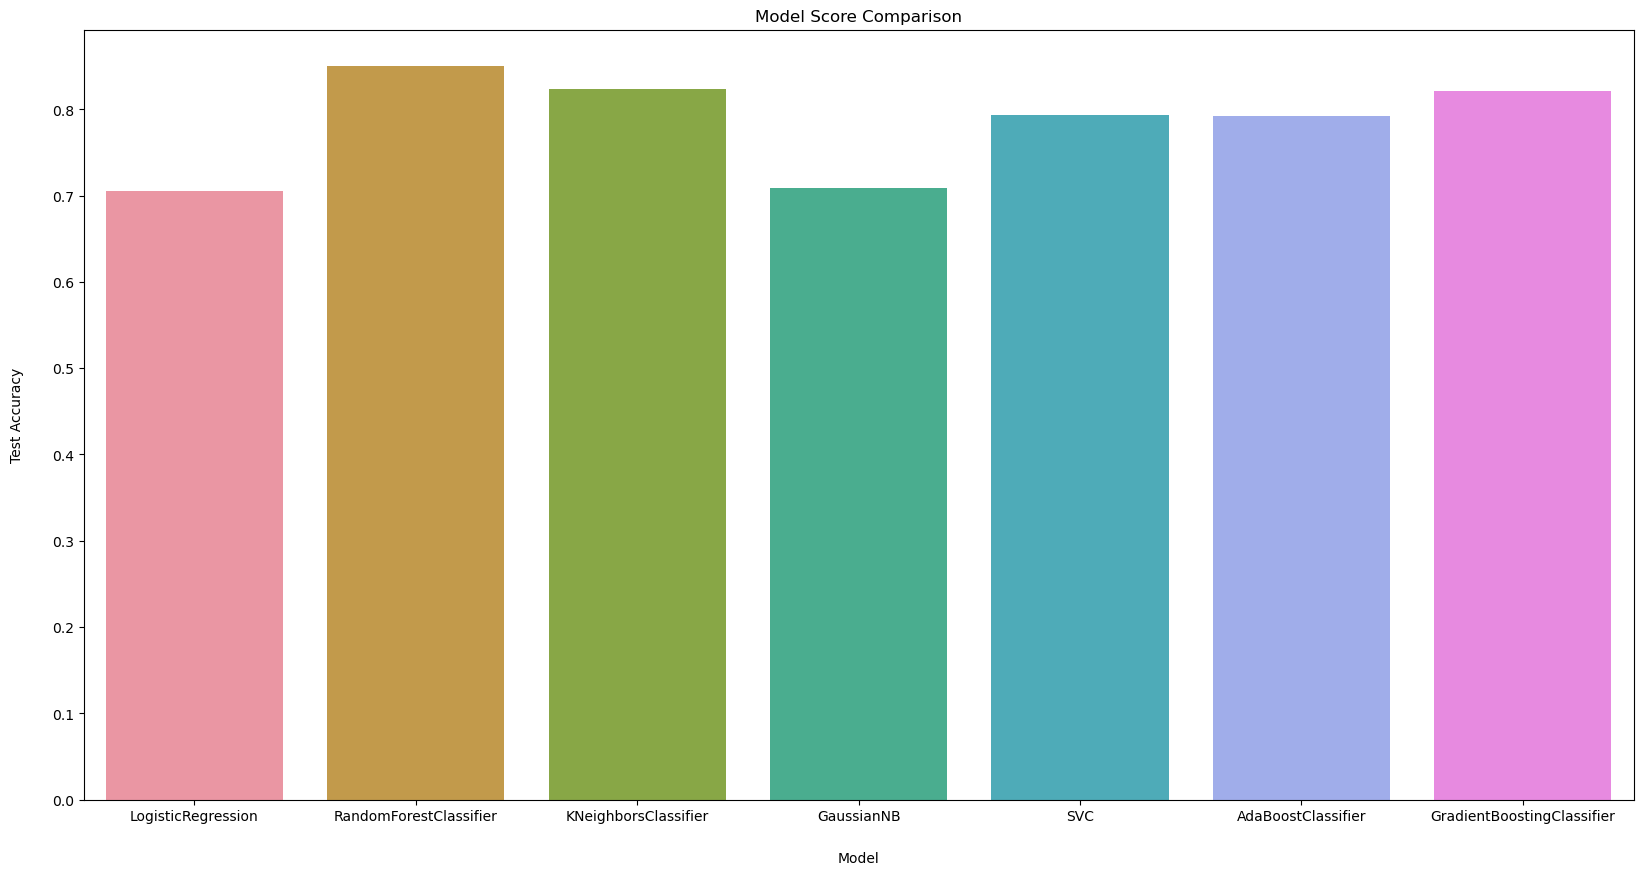

In [445]:
# Histogram for Model Scores
plt.figure(figsize = (20, 10))
sns.barplot(x = "Model", y = "Test Accuracy", data=scores_table)
plt.xlabel("Model", labelpad=20)
plt.ylabel("Test Accuracy", labelpad=20)
plt.title("Model Score Comparison")

## 2.4. Ensemble Modelling

In this subsection, I will take three best performing models and create an ensemble model.

In [446]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[("RandomForestClassifier", RandomForestClassifier()),("KNeighborsClassifier", KNeighborsClassifier()),
                                  ("GradientBoostingClassifier", GradientBoostingClassifier())], voting='soft')
vc.fit(X_train, y_train)
train_score_ens = vc.score(X_train, y_train)
test_score_ens = vc.score(X_test, y_test)

print("Training Accuracy: ", (train_score_ens*100).round(2), "%")
print("Testing Accuracy: ", (test_score_ens*100).round(2), "%")

Training Accuracy:  93.23 %
Testing Accuracy:  84.78 %


# Conclusions

- The dataset contains 10 000 records and 14 columns, initially.
- The percentage of customers that have exited is 25.6%. The dependent variable is highly imbalanced.
- The feature that has the biggest impact on the target variable, 'Exited', is 'Age' with positive correlation of 0.29.
- There is significant relationship between a categorical variable 'Geography' and the target variable, 'Exited'.
- The three best peforming models are Random Forest Classifier, KNN Classifier, and Gradient Boosting Classifier.
- The accuracy score for Ensemble Model is around 85%.